In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

Importar base de datos de Kaggle directamente sin descargar

In [6]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

# Esto te mostrará el nombre exacto de todos los archivos en esa carpeta
print('Documentos en la carpeta: ')
print(os.listdir(path))

c:\Users\hzapata1\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 22.0k/22.0k [00:00<00:00, 13.1MB/s]

Extracting files...
Path to dataset files: C:\Users\hzapata1\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1
Documentos en la carpeta: 
['Titanic-Dataset.csv']


Ya sabiendo que el 'Titanic.Dataset' se guardo como un.csv, entonces llamamos el dataset y empezamos a explorarlo

In [7]:
# Unimos la ruta con el nombre del archivo CSV
dataset_name = os.listdir(path)

ruta_dataset = os.path.join(path, dataset_name[0])

titanic_dataset = pd.read_csv(ruta_dataset)

#Ver las primeras 5 filas del dataset
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Ver las últimas 5 filas del dataset
titanic_dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
#Saber cuales son las columans con las que cuenta el dataset
titanic_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='str')

In [10]:
#Saber tipo de cada columna y si tiene datos nulos
titanic_dataset.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [11]:
#Valores nulo por columa
titanic_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# make a copy of the dataframe
titanic = titanic_dataset.copy()
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='str')

In [13]:
# Renombrar usando nombres más estándar (sin caracteres especiales)
titanic = titanic.rename(columns={
    "Pclass": "Ticket_class", 
    "SibSp": "Siblings_Spouses_Aboard", 
    "Parch": "Parents_Children_Aboard", 
    "Ticket": "Ticket_Number",
    "Fare": "Passenger_Fare", 
    "Cabin": "Cabin_Number", 
    "Embarked": "Port_Embarkation"
})
titanic.columns

Index(['PassengerId', 'Survived', 'Ticket_class', 'Name', 'Sex', 'Age',
       'Siblings_Spouses_Aboard', 'Parents_Children_Aboard', 'Ticket_Number',
       'Passenger_Fare', 'Cabin_Number', 'Port_Embarkation'],
      dtype='str')

Ver la distribución de los datos

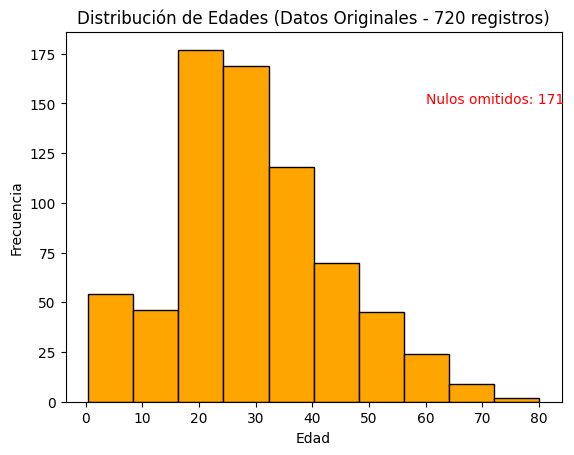

In [14]:
# Usamos .dropna() explícitamente para asegurar que solo graficamos datos existentes
titanic['Age'].dropna().hist(bins=10, grid=False, color='orange', edgecolor='black')

# Añadir títulos y etiquetas para mayor claridad
plt.title('Distribución de Edades (Datos Originales - 720 registros)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar la cantidad de nulos en el gráfico como texto (opcional)
plt.annotate(f'Nulos omitidos: 171', xy=(60, 150), color='red')
plt.show()


De acuerdo a la distribución que se tiene en el histograma de las edades, lo mejor para rellenar esos valores faltantes sin eliminarlos es: la mediana por agrupación.
La mediana por agrupación es buena porque reduce el sesgo artificial que genera solo llenar con la mediana

In [16]:

titanic = titanic_dataset.copy()

print(titanic['Age'].median())

28.0


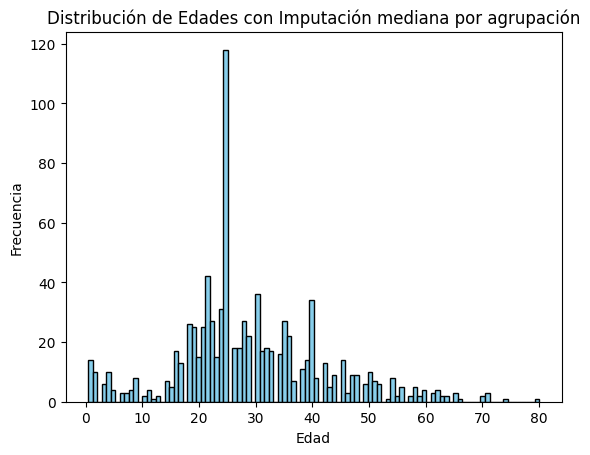

In [17]:
# Reemplazo NaN con la mediana agrupada por sexo y clase
titanic["Age"] = titanic.groupby(["Sex", "Pclass"])["Age"].transform(
    lambda x: x.fillna(x.median())
)


titanic['Age'].hist(bins=100, grid=False, edgecolor='black', color='skyblue')

# Añadir títulos y etiquetas para mayor claridad
plt.title('Distribución de Edades con Imputación mediana por agrupación')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()


Tratando de mejorar el relleno de 'Age', usamos el clasificador KNN

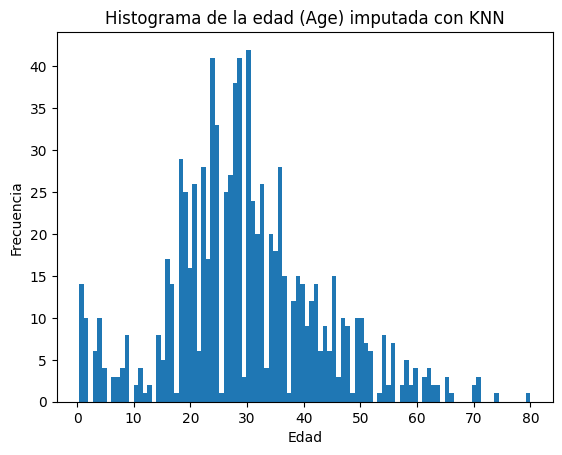

In [20]:
from sklearn.impute import KNNImputer

features = ["Pclass", "Sex", "SibSp", "Parch", "Fare"]

df_knn = titanic_dataset.copy()
df_knn["Sex"] = df_knn["Sex"].map({"male": 0, "female": 1})

imputer = KNNImputer(n_neighbors=5)
df_knn["Age"] = imputer.fit_transform(df_knn[features + ["Age"]])[:, -1]

#Plot del nuevo histograma de la edad con KNN
plt.hist(df_knn["Age"], bins=100)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de la edad (Age) imputada con KNN")

plt.show()




Como la imputación seleccionada fue KNN entonces el dataframe 'titanic' va a ser esa

In [47]:
titanic = df_knn.copy()

# Renombrar usando nombres más estándar (sin caracteres especiales)
titanic = titanic.rename(columns={
    "Pclass": "Ticket_class", 
    "SibSp": "Siblings_Spouses_Aboard", 
    "Parch": "Parents_Children_Aboard", 
    "Ticket": "Ticket_Number",
    "Fare": "Passenger_Fare", 
    "Cabin": "Cabin_Number", 
    "Embarked": "Port_Embarkation"
})

titanic.columns

Index(['PassengerId', 'Survived', 'Ticket_class', 'Name', 'Sex', 'Age',
       'Siblings_Spouses_Aboard', 'Parents_Children_Aboard', 'Ticket_Number',
       'Passenger_Fare', 'Cabin_Number', 'Port_Embarkation'],
      dtype='object')

In [50]:
#Llenar los valores nulos de la puerta de embarque
# Reemplazo NaN con la moda agrupada por clase de ticket (mejor para datos categóricos)
titanic["Port_Embarkation"] = titanic.groupby(["Ticket_class"])["Port_Embarkation"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'S')
)

In [51]:
titanic.isna().sum()

PassengerId                  0
Survived                     0
Ticket_class                 0
Name                         0
Sex                          0
Age                          0
Siblings_Spouses_Aboard      0
Parents_Children_Aboard      0
Ticket_Number                0
Passenger_Fare               0
Cabin_Number               687
Port_Embarkation             0
dtype: int64

There are some different age values like: 40.5, 0.75... etc.
We apply a round to aproximate to an integer value

In [11]:
titanic["Age"].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [14]:
#apply math.ceil to round to he higher value
titanic["Age"]= titanic["Age"].apply(math.ceil)

In [17]:
titanic["Age"].unique()

array([22, 38, 26, 35, 28, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  1, 30, 33, 23, 24, 46, 59, 71, 37, 47, 12,  9, 51, 56, 41,
       44, 61, 50, 36, 62, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57, 80, 70,
        6, 74])

In [54]:
survived_values = titanic["Survived"].value_counts().sort_index()
#survived_values.plot(kind="bar", xlabel = "Survival status 1:yes 0:no", ylabel = "N° of passengers", title ="Survival distribution")

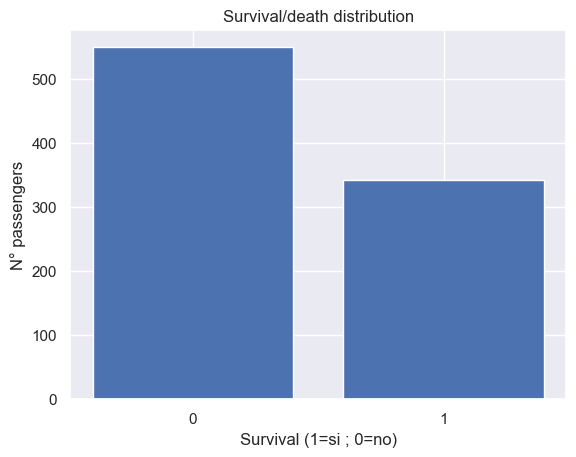

In [ ]:
sns.set()
plt.figure()
plt.bar(survived_values.index.astype(str), survived_values.values)
plt.title("Survival/death distribution")
plt.ylabel("N° passengers")
plt.xlabel("Survival (1=si ; 0=no)")
plt.show()

---

# **Cambios de Yeison:**

### **Sobre los missings en Edad**:

- **Razones para no usar la mediana:**
     
     Ignora que la edad en el Titanic está fuertemente correlacionada con otras variables. Si imputas la mediana global (~28 años), estarás asignando esa edad a niños de tercera clase o a capitanes de primera clase, eliminando la varianza natural y creando un "pico" artificial en la distribución que sesga el análisis y los modelos a desarrollar

- **Razones para no usar la mediana por sexo y clase:**

     Aunque la clase (Pclass) influye (los de primera clase solían ser mayores), el sexo no es un predictor tan fuerte de la edad por sí solo en este contexto. Este enfoque sigue perdiendo matices importantes: Por ejemplo, un "Master" (niño) y un "Mr" (adulto) en 3ra clase tendrían la misma edad imputada si solo usamos sexo y clase
     
- **Razones para no usar KNN:**

     Sigue teniendo el problema de que personas con caracteristicas similares en sexo, clase, parientes, etc pueden tener edades muy distintas

**Alternativa de solución observada en foros: *Feature Engineering (Títulos)***:

la variable Name no es solo ruido. Contiene Títulos (Mr, Mrs, Miss, Master, Dr, Rev, etc.) que pueden servir como mejor predictor de la edad.


- Contexto Social: En 1912, el título era un indicador estricto de estatus y etapa de vida.

- El caso de "Master": En este dataset, todos los que tienen el título "Master" son niños varones (generalmente < 13 años). Si usas la mediana de clase/sexo, les pondrías ~25-30 años, lo cual es un error fatal dado que "niños y mujeres primero" fue la regla de supervivencia.

- Captura de Varianza: Los títulos como Miss (solteras, suelen ser más jóvenes) vs Mrs (casadas) ofrecen una segmentación mucho más fina que Sex y Pclass por sí solos.

**De esta manera podemos usar imputación por mediana agrupada pero según el titulo y la clase**  
(Notese que el titulo hace que agrupar por sexo sea rebundante mientras que, en este contexto, la variable clase suele ser mejor predictor complementario de edad dado que la 1ra clase solía estar conformada por mayores)

Paso a paso:

1. Extraer el título de la columna Name usando Regex.
2. verificar edad mediana según titulos (tiene sentido el resultado?)
3. Ver posibilidades de crear/agrupar categorías de titulos más generales para aquellos titulos atipicos
3. Rellenar NA con mediana agrupada según el titulo y la clase (verificando antes que la estadística descriptiva muestre variación)


In [9]:
# 1. Extraer el título (usando tu columna 'Name')

# obervamos el patro en Name para hacer el Regex: "Apellido, Título. Resto del Nombre"
print("----- Identificar patron ----")
print(titanic['Name'].value_counts())
print("-----")
#Verifiquemos que el nombre siempre sigue la misma extructura: "Apellido, Título. Resto del Nombre"
sin_patron = titanic[~titanic['Name'].str.contains(', [A-Za-z]+\.', regex=True)]
print(f"Registros que no siguen el patrón estándar: {len(sin_patron)}")
if len(sin_patron) > 0:
    print(sin_patron['Name'].head())
print("-----")
#Solo 1 observación no sigue el patron, pero no es grave: el titulo es "the Countess" pero igual el Regex nos permite capturar "Countess", lo cual nos sirve para nuestro ejercicio)
#Procedemos a extraer el titulo

titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

----- Identificar patron ----
Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
                                                      ..
Montvila, Rev. Juozas                                  1
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    1
Name: count, Length: 891, dtype: int64
-----
Registros que no siguen el patrón estándar: 1
759    Rothes, the Countess. of (Lucy Noel Martha Dye...
Name: Name, dtype: object
-----


In [10]:
# 2. Ver frecuencias totales de títulos, edad promedio según titulo y missings según titulo
print("--- Frecuencia de Títulos ---")
print(titanic['Title'].value_counts())
print("-----")
# 3. Ver relación Título-Edad (Mediana y conteo de NAs)
# Esto te confirmará si hay títulos con muchos missings
reporte_titulos = titanic.groupby('Title')['Age'].agg(
    mediana='median',
    count='count',
    missings=lambda x: x.isnull().sum()
).sort_values(by='count', ascending=False)

print("\n--- Reporte de Edad por Título ---")
print(reporte_titulos)

--- Frecuencia de Títulos ---
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64
-----

--- Reporte de Edad por Título ---
          mediana  count  missings
Title                             
Mr           30.0    398       119
Miss         21.0    146        36
Mrs          35.0    108        17
Master        3.5     36         4
Rev          46.5      6         0
Dr           46.5      6         1
Mlle         24.0      2         0
Major        48.5      2         0
Col          58.0      2         0
Capt         70.0      1         0
Lady         48.0      1         0
Countess     33.0      1         0
Don          40.0      1         0
Jonkheer     38.0      1         0
Mme          24.0      1         0
Ms           28.0      1     

3. Dado que los titulos atipicos no tienen valores vacíos en edad, salvo por Dr, no vale la pena realizar agrupaciones más generales por titulo. No obstante, el análisis anterior nos permite confirmar que la edad mediana sí varía según el titulo, lo cual luego nos servirá para no asignar una edad mayor a los niños (Master) y las mujeres solteras (Miss). Mientras que a los hombres y mujeres casadas, que representan la mayoría de los missings en edad, se les puede asignar la edad mediana de su grupo por titulo y clase.

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              891 non-null    int64  
 1   Survived                 891 non-null    int64  
 2   Ticket_class             891 non-null    int64  
 3   Name                     891 non-null    object 
 4   Sex                      891 non-null    object 
 5   Age                      714 non-null    float64
 6   Siblings_Spouses_Aboard  891 non-null    int64  
 7   Parents_Children_Aboard  891 non-null    int64  
 8   Ticket_Number            891 non-null    object 
 9   Passenger_Fare           891 non-null    float64
 10  Cabin_Number             204 non-null    object 
 11  Port_Embarkation         889 non-null    object 
 12  Title                    891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [ ]:
# Antes de hacer el replace veamos las edades medianas según las combinaciones de titulo y clase
# Crear la tabla de referencia agrupada por Título y Clase
tabla_referencia = titanic.groupby(['Title', 'Ticket_class'])['Age'].agg(
    mediana='median',
    promedio='mean',
    registros_reales='count',
    faltantes=lambda x: x.isnull().sum()
).reset_index()

# Ordenar para ver los grupos con más datos faltantes primero
print("--- Tabla de Referencia: Edad por Título y Clase ---")
print(tabla_referencia.sort_values(by='faltantes', ascending=False))

--- Tabla de Referencia: Edad por Título y Clase ---
       Title  Ticket_class  mediana   promedio  registros_reales  faltantes
19        Mr             3     26.0  28.724891               229         90
14      Miss             3     18.0  16.123188                69         33
17        Mr             1     40.0  41.580460                87         20
18        Mr             2     31.0  32.768293                82          9
22       Mrs             3     31.0  33.515152                33          9
20       Mrs             1     41.5  40.882353                34          8
11    Master             3      4.0   5.350833                24          4
13      Miss             2     24.0  22.390625                32          2
4         Dr             1     46.5  43.750000                 4          1
12      Miss             1     30.0  30.000000                45          1
9     Master             1      4.0   5.306667                 3          0
8      Major             1     48.5

La estadística descriptiva nos muestra que la edad mediana también varía según el titulo y la clase, por lo cual entonces procedemos a reemplazar las edades vacías por la mediana según titulo y clase:

In [13]:
# 4. Imputar edad según titulo y clase:
# 'transform' calcula la mediana para cada grupo y la distribuye en las filas correspondientes
titanic['Age'] = titanic['Age'].fillna(
    titanic.groupby(['Title', 'Ticket_class'])['Age'].transform('median')
)

print(f"Total de valores nulos en Age tras la limpieza: {titanic['Age'].isnull().sum()}")

# 4. Breve resumen estadístico post-imputación
print("\nResumen de la variable Age después de la limpieza:")
print(titanic['Age'].describe())

Total de valores nulos en Age tras la limpieza: 0

Resumen de la variable Age después de la limpieza:
count    891.000000
mean      29.146655
std       13.499426
min        0.420000
25%       21.000000
50%       26.000000
75%       36.750000
max       80.000000
Name: Age, dtype: float64


---

# **Transformación ONE HOT Encoding para la variable edad**

In [15]:
# 1. Vamos a crear una variable categorica que agrupe la edad según rangos de edad (ciclo vital)
import pandas as pd

# Definir los puntos de corte y las etiquetas
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teenager', 'Adult', 'Senior']

# Crear la nueva columna
titanic['Age_Group'] = pd.cut(titanic['Age'], bins=bins, labels=labels)
print(titanic['Age_Group'].unique())

# 2. Seleccionamos la columna a modificar



# 3. Aplicamos pd.get_dummies()



# 4. Concatenamos



# 5. Eliminamos la original



['Adult', 'Child', 'Teenager', 'Senior']
Categories (4, object): ['Child' < 'Teenager' < 'Adult' < 'Senior']
